### Import all the necessary libraries

In [16]:
import tensorflow as tf
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import class_weight
import struct

### Read image data

In [17]:
file_path = "Kaggle Dataset/train-images.idx3-ubyte"
def read_idx_images(file_path):
    with open(file_path, 'rb') as f:
        _, num, rows, cols = struct.unpack('>IIII', f.read(16))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows, cols)

In [18]:
file_path = "Kaggle Dataset/t10k-images.idx3-ubyte"
def read_idx_images(file_path):
    with open(file_path, 'rb') as f:
        _, num, rows, cols = struct.unpack('>IIII', f.read(16))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows, cols)

In [19]:
file_path = "Kaggle Dataset/train-labels.idx1-ubyte"
def read_idx_labels(file_path):
    with open(file_path, 'rb') as f:
        _, num = struct.unpack('>II', f.read(8))
        return np.frombuffer(f.read(), dtype=np.uint8)

In [20]:
file_path = "Kaggle Dataset/t10k-labels.idx1-ubyte"
def read_idx_labels(file_path):
    with open(file_path, 'rb') as f:
        _, num = struct.unpack('>II', f.read(8))
        return np.frombuffer(f.read(), dtype=np.uint8)

### Loading datasets

In [21]:
# Paths to the MNIST files in Kaggle
train_images_path = "Kaggle Dataset/train-images.idx3-ubyte"
train_labels_path = "Kaggle Dataset/train-labels.idx1-ubyte"
test_images_path = "Kaggle Dataset/t10k-images.idx3-ubyte"
test_labels_path = "Kaggle Dataset/t10k-labels.idx1-ubyte"

In [22]:
# Load images and labels
train_images = read_idx_images(train_images_path)
train_labels = read_idx_labels(train_labels_path)
test_images = read_idx_images(test_images_path)
test_labels = read_idx_labels(test_labels_path)

### Display total no of Images and Labels

In [23]:
print(f"Train Images Shape: {train_images.shape}")  
print(f"Train Labels Shape: {train_labels.shape}")

Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000,)


### Normalize pixel values to the range of [0,1]

In [24]:
# Normalize data
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
### Create and compile CNN model including all layers

In [25]:
def create_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), #It will include 32 filters of 3*3 kernel and decide image size as 28*28
        layers.MaxPooling2D((2,2)),                                         #It will reduce the feature map size to 2*2 by capturing maximum features
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),                                                   # It will convert 2D feture map into 1D vector
        layers.Dense(128, activation='relu'),                               # All 128 neurons from this layer will learn complex pattern
        layers.Dense(10, activation='softmax')                              # It will Create 10 Classes for 10 digits and softmax will add probabilities
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()

### Train the model on the given dataset

In [26]:
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=5, validation_data=(test_images[..., np.newaxis], test_labels))

Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1260 - accuracy: 0.9612 - val_loss: 0.0578 - val_accuracy: 0.9814
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0403 - accuracy: 0.9873 - val_loss: 0.0390 - val_accuracy: 0.9869
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0451 - val_accuracy: 0.9858
Epoch 4/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.0323 - val_accuracy: 0.9894
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.0268 - val_accuracy: 0.9913


### Plot the accuracy

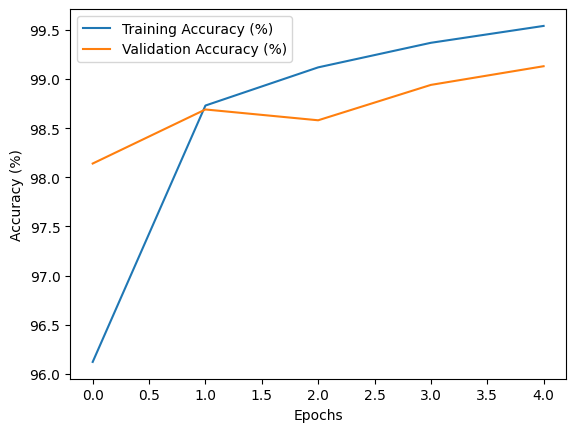

In [27]:
plt.plot(np.array(history.history['accuracy']) * 100, label='Training Accuracy (%)')
plt.plot(np.array(history.history['val_accuracy']) * 100, label='Validation Accuracy (%)')
plt.ylabel('Accuracy (%)')  
plt.xlabel('Epochs') 
plt.legend()
plt.show()


### Create biased dataset

In [28]:
def create_biased_dataset(train_images, train_labels):
    mask = np.isin(train_labels, [0,1,2,3,4,5,6])  
    x_train_biased = train_images[mask]
    y_train_biased = train_labels[mask]
    return x_train_biased, y_train_biased              #removes 7, 8, 9 numbers from the dataset

In [29]:
x_train_biased, y_train_biased = create_biased_dataset(train_images, train_labels)

### Retrain the model and compare the metrics

In [30]:
biased_model = create_model()
biased_history = biased_model.fit(
    x_train_biased[..., np.newaxis], y_train_biased,
    epochs=5, validation_data=(test_images[..., np.newaxis], test_labels)
)

Epoch 1/5
1311/1311 [==============================] - 21s 15ms/step - loss: 0.0908 - accuracy: 0.9726 - val_loss: 4.1622 - val_accuracy: 0.6932
Epoch 2/5
1311/1311 [==============================] - 20s 15ms/step - loss: 0.0270 - accuracy: 0.9918 - val_loss: 4.1399 - val_accuracy: 0.6946
Epoch 3/5
1311/1311 [==============================] - 20s 15ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 4.6143 - val_accuracy: 0.6947
Epoch 4/5
1311/1311 [==============================] - 20s 15ms/step - loss: 0.0124 - accuracy: 0.9959 - val_loss: 4.6233 - val_accuracy: 0.6953
Epoch 5/5
1311/1311 [==============================] - 20s 15ms/step - loss: 0.0096 - accuracy: 0.9971 - val_loss: 5.1223 - val_accuracy: 0.6943


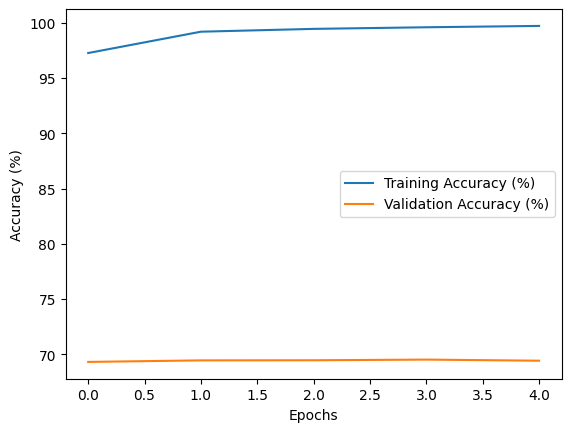

In [31]:
plt.plot(np.array(biased_history.history['accuracy']) * 100, label='Training Accuracy (%)')
plt.plot(np.array(biased_history.history['val_accuracy']) * 100, label='Validation Accuracy (%)')
plt.ylabel('Accuracy (%)')  
plt.xlabel('Epochs') 
plt.legend()
plt.show()

**Inference:** From above we can observe that accuracy has been decreased after creating biased dataset

# Strategies to Handle Imbalance
 - Use class weighting

## Compute class weights to handle imbalance

In [32]:
biased_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_biased), y=y_train_biased)
biased_class_weights_dict = {i: biased_weights[i] for i in np.unique(y_train_biased)}

### Retrian model after applying class weighting technique

In [33]:
balanced_biased_model = create_model()
balanced_biased_history = balanced_biased_model.fit(
    x_train_biased[..., np.newaxis], y_train_biased,
    epochs=5,
    validation_data=(test_images[..., np.newaxis], test_labels),
    class_weight=biased_class_weights_dict  # Apply class weights for balancing
)

Epoch 1/5
1311/1311 [==============================] - 20s 15ms/step - loss: 0.0884 - accuracy: 0.9732 - val_loss: 4.1021 - val_accuracy: 0.6920
Epoch 2/5
1311/1311 [==============================] - 21s 16ms/step - loss: 0.0249 - accuracy: 0.9926 - val_loss: 4.0481 - val_accuracy: 0.6953
Epoch 3/5
1311/1311 [==============================] - 21s 16ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 4.6401 - val_accuracy: 0.6942
Epoch 4/5
1311/1311 [==============================] - 20s 16ms/step - loss: 0.0130 - accuracy: 0.9960 - val_loss: 4.5673 - val_accuracy: 0.6952
Epoch 5/5
1311/1311 [==============================] - 21s 16ms/step - loss: 0.0083 - accuracy: 0.9973 - val_loss: 4.6982 - val_accuracy: 0.6950


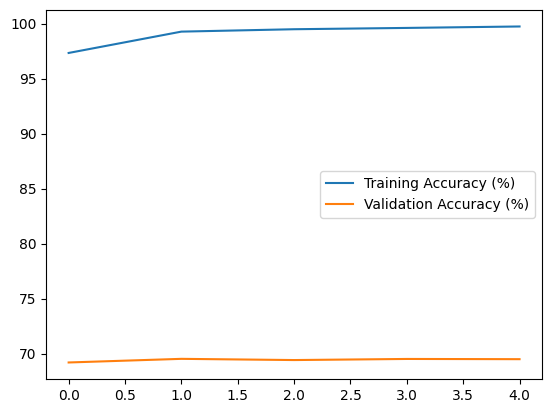

In [35]:
plt.plot(np.array(balanced_biased_history.history['accuracy']) * 100, label='Training Accuracy (%)')
plt.plot(np.array(balanced_biased_history.history['val_accuracy']) * 100, label='Validation Accuracy (%)')
plt.legend()
plt.show()

**Inference**: As you can observe that **accuracy** has been increased slightly after applying **class weighting** technique